In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from IPython.display import HTML
import plotly.express as px

# 맥 폰트 깨짐 이슈 해결
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

https://wikidocs.net/155914
위키독스 참조

 https://rfriend.tistory.com/268

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html

In [2]:
col = ['X','Y']
data1 = [[-6,-3],[-4,-1],[-2,-3],[0,1],[2,2]]
data2 = [[7,-4],[4,-1],[2,0],[-1,3],[-4,9]]
data3 = [[3,-4],[3,-1],[3,0],[3,3],[3,9]]
df1 = pd.DataFrame(data=data1, columns=col)
df2 = pd.DataFrame(data=data2, columns=col)
df3 = pd.DataFrame(data=data3, columns=col)

In [3]:
df1

,X,Y
0,-6,-3
1,-4,-1
2,-2,-3
3,0,1
4,2,2


In [4]:
df1.cov() # 양의 상관관계

,X,Y
X,10.0,6.0
Y,6.0,5.2


In [5]:
df2.cov() # 음의 상관관계

,X,Y
X,18.30,-20.55
Y,-20.55,24.30


In [6]:
df3.cov() # 상관이 없음

,X,Y
X,0.0,0.0
Y,0.0,24.3


In [7]:
# 첨도(kurtosis, kurt) : 데이터 분포의 뾰족한 정도
# 확률분포의 꼬리가 두꺼운 정도를 나타내는 척도이다. 극단적인 편차 또는 이상치가 많을 수록 큰 값을 나타낸다. 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다.
# 정규분포 : 0, 정규분포보다 뾰족한 경우 : > 0 ,정규분포 완만한 경우 : < 0

l = [-9,-5,-1,-1,0,0,0,0,0,1,1,5,9] 
m = np.random.normal(0,1,13) 
p = [-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6] 
data = {"col1":l,"col2":m,"col3":p}
df = pd.DataFrame(data)
print(df)

    col1      col2  col3
0     -9 -1.421193    -6
1     -5  1.159308    -5
2     -1 -1.582074    -4
3     -1 -0.015649    -3
4      0 -0.737100    -2
5      0  0.692628    -1
6      0 -0.032585     0
7      0  0.288722     1
8      0  1.261685     2
9      1  0.831417     3
10     1  2.039645     4
11     5 -0.393166     5
12     9  0.317451     6


In [8]:
df['col1'].kurt() # 첨도

2.190460157126824

In [9]:
df['col1'].mean() # 0
df['col1'].std() # 4.2

4.242640687119285

In [10]:
df['col2'].kurt()

-0.3449630300456201

In [11]:
df['col2'].mean() # -0.054
df['col2'].std() # 1.175

1.049866139186792

In [12]:
df['col3'].kurt() # -1.2
df['col3'].mean() # 0.0
df['col3'].std() # 3.894

3.8944404818493075

In [13]:
# 왜도(skew) : 데이터 분포의 조우 비대칭도를 표현하는 척도입니다. 
#            즉 데이터의 분포가 얼마나 대칭이 아닌지를 나타냅니다.
# 정규분포 = 왜도 = 0 / 왼쪽으로 치우침 = 왜도 > 0 / 오른쪽으로 치우침 = 왜도 < 0

In [14]:
a = [-5,-4,-3,-3,-2,-2,-1,-1,-1,0,0,0,0,0,1,1,1,2]
b = [-3,-2,-1,-1,-1,-1,0,0,0,0,0,0,1,1,1,1,2,3]
c = [-2,-1,-1,-1,0,0,0,0,0,1,1,1,2,2,3,3,4,5,]
data = {"col1":a,"col2":b,"col3":c}
df = pd.DataFrame(data)

In [15]:
df

,col1,col2,col3
0,-5,-3,-2
1,-4,-2,-1
2,-3,-1,-1
3,-3,-1,-1
4,-2,-1,0
5,-2,-1,0
6,-1,0,0
7,-1,0,0
8,-1,0,0
9,0,0,1


In [16]:
# col1은 최빈값이 우측으로 치우쳐 있음 / 왜도 < 0
df['col1'].skew()

-0.6157739556801386

In [17]:
df['col2'].mean() # 0 출력
df['col2'].skew() # 정규분포(대칭구조) / 왜도 = 0


0.0

In [18]:
df['col3'].mean() # 평균 0.94 / 최빈값이 좌측으로 치우쳐 있음/ 왜도 > 0
df['col3'].skew()

0.6157739556801384

상관계수
1) 피어슨 상관계수
두 변수가 연속형 / 선현관계 / 딥러닝 점수와 데이터 분석 점수의 상관관계
연속형 자료가 정규분포를 따른다고 가정하는 모수적 추론 기법

2) 스피어만 상관관계
순위가 있는 서열척도간의 상관관계 / 딥러닝 등수와 데이터분석 등수의 상관관계
두 변수 간의 관계가 비선형적(곡선)일때 사용가능


3) 켄달(kendall)의 타우(tau)
두 변수 간의 관계가 비선형적이거나 서열척도의 변수 일때, 표본이 작을때

phi 상관계수 / Cramer's 상관계수
범주형 변수간 상관관계

1) phi 상관관계(변수가 갖는 값의 범주가 2개)
ex) 성별 : 남/여, 합격여부 : 합격/불합격
성별과 합격여부와의 상관관계가 궁금? phi 상관계수

2) Cramer's 상관계수(변수가 갖는 값의 범주가 3개 이상)
   ex) 나이대 : 10대 / 20대 / 30대 / 40대, 거주형태 : 단독/빌라/아파트/복합
   나이대와 거주형태간의관계? cramer's 상관계수 

point biseral 상관계수
연속형 변수와 범주형 변수간 상관관계
ex)성별과 시험점수간의 상관관계

In [19]:
z = [-3, -2, -1, 0, 1, 2, 3]
w = [9, 4, 1, 0, 1, 4, 9]

np.corrcoef(z, w)[0, 1] # 피어슨 상관계수/ w = z**2 / 비선형

0.0

In [20]:
# 스피어만 상관계수
import scipy.stats as ss 

In [21]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [22]:
ss.spearmanr(x,y).correlation

0.9000703207408192

In [23]:
col1 = [1,2,3,4,5,6]
col2 = [1,4,2,8,16,32]
col3 = [6,5,4,3,2,1]
data = {"col1":col1,"col2":col2,"col3":col3}
df = pd.DataFrame(data)
print(df)

   col1  col2  col3
0     1     1     6
1     2     4     5
2     3     2     4
3     4     8     3
4     5    16     2
5     6    32     1


col1 변수의 순위와 col2 변수의 순위가 대체로 일치 -> 스피어만 상관계수가 양수
스피어만 상관계수 : 두 변수의 순위에 대한 피어슨 상관계수

In [24]:
df.corr() # 피어슨

,col1,col2,col3
col1,1.000000,0.887739,-1.000000
col2,0.887739,1.000000,-0.887739
col3,-1.000000,-0.887739,1.000000


In [25]:
df.corr(method='pearson')

,col1,col2,col3
col1,1.000000,0.887739,-1.000000
col2,0.887739,1.000000,-0.887739
col3,-1.000000,-0.887739,1.000000


In [26]:
df.corr(method='spearman')

,col1,col2,col3
col1,1.000000,0.942857,-1.000000
col2,0.942857,1.000000,-0.942857
col3,-1.000000,-0.942857,1.000000


In [27]:
df.corr(method='kendall') # 비선형적 / 표본이 많을때

,col1,col2,col3
col1,1.000000,0.866667,-1.000000
col2,0.866667,1.000000,-0.866667
col3,-1.000000,-0.866667,1.000000


In [28]:
ss.kendalltau(df['col1'],df['col2']).correlation # 비선형적 / 표본이 적을때

0.8666666666666666

In [29]:
data1 = {"col1":[1,2,3,4,5,6],"col2":[1,4,2,8,16,32]}
data2 = {"col1":[6,5,4,3,2,1],"col3":[3,6,1,2,5,9]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [30]:
df1

,col1,col2
0,1,1
1,2,4
2,3,2
3,4,8
4,5,16
5,6,32


In [31]:
df1.corr()

,col1,col2
col1,1.000000,0.887739
col2,0.887739,1.000000


In [32]:
df2.corr()

,col1,col3
col1,1.000000,-0.508391
col3,-0.508391,1.000000


df1의 col1과 df2의 col2간의 상관관계

In [33]:
df1.corrwith(df2)

col1   -1.0
col2    NaN
col3    NaN
dtype: float64

In [34]:
df1.corrwith(df2, method='pearson')

col1   -1.0
col2    NaN
col3    NaN
dtype: float64

In [35]:
df1.corrwith(df2, method='pearson', drop=True)

col1   -1.0
dtype: float64

표본에서 구한 상관계수
동일한 모집단에서 추추뢴 표본에 따라 상관계수도 달라짐
=> 상관계수에 대해 통계적 검증(p-value)
=> p-value < 0.05 인 경우에는 '통계적으로 유의미하다

In [36]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [37]:
ss.pearsonr(x,y).correlation

0.862517279213578

In [38]:
np.corrcoef(x, y)[0, 1]

0.8625172792135779

In [39]:
df4=pd.DataFrame({'col1':x,'col2':y})
df4.corr()

,col1,col2
col1,1.000000,0.862517
col2,0.862517,1.000000


In [40]:
ss.pearsonr(x,y)

PearsonRResult(statistic=0.862517279213578, pvalue=0.0013196539142000018)

상관계수 0.86 / pvalue 0.001
연속형 변수, 정규분포(이상치가 거의 없음) / 선형관계

가설 : 
귀무가설
일반적인 사람들이 알고 있는 통념 / 
기존의 입장(H0) / 모집단이 어떤 특징을 가질 것으로 여겨지는 가설 / 실험을 통해 기각하고자 하는 가설


대립가설 : 
일반적인 사람들이 알고 있는 통념에 반하는 새로운 주장 / 
귀무가설의 상반된 입장 (H1) / 귀무가설의 반대되는 가설 / 실험을 통해 귀가설이 틀리다고 증명야하는 가설

가설 검정
 1) 귀무 / 대립가설 수립
 2) 표분추출, 확률 실험
 3) 유의수준 설정 -> 의사결정 기준



남학생들의 평균 성적이 여학생들보다 높을 것이다
귀무가설 : 남학생들의 평균 성적이 여학생들보다 낮거나 같다
대랍가설 : 남학생들의 평균 성적이 여학생들보다 높다

=> 귀무가설을 ㅂ먼저수립하고 이것을 기각할 수있는 증거를 찾아내서, 주장하고 싶은 가설인 대립가설을 채택하로록 한다.

상관계수에서의 귀무가설이 '상계수가 0이다'(상관관계가 없다)
대립가설은 '상관계수가 0이 아니다'(상관관계가 있다.)

p-value는 모집단에서 상관계수가 0일때, 표본에 대한 상관계수(0.86)보다 더 극단적인 상관계수가 관찰된 확률



표준화, 정규화

표준화 : 평균이 0 / 표준편차가 1인 표준정규분포로 표준화항는 것

In [41]:
data = np.random.randint(30, size=(6, 5))

In [42]:
data

array([[28, 29, 26, 29, 22],
       [ 3, 15, 28, 17,  9],
       [12, 23,  1,  9, 21],
       [17, 24,  7,  4, 25],
       [24, 15,  5, 29, 21],
       [ 0,  1, 29,  5, 26]])

표준화값 = (각 데이터 - 데이터 평균) / 표준퍈차

In [45]:
np.mean(data)
np.mean(data, axis=0)

array([14.        , 17.83333333, 16.        , 15.5       , 20.66666667])

In [48]:
(data - np.mean(data,axis=0)) / np.std(data, axis=0)

array([[ 1.3706182 ,  1.23713978,  0.84515425,  1.29554405,  0.23990406],
       [-1.0769143 , -0.31390114,  1.01418511,  0.14394934, -2.0991605 ],
       [-0.1958026 ,  0.57240796, -1.26773138, -0.62378047,  0.05997601],
       [ 0.2937039 ,  0.68319659, -0.76063883, -1.1036116 ,  0.77968819],
       [ 0.979013  , -0.31390114, -0.92966968,  1.29554405,  0.05997601],
       [-1.3706182 , -1.86494205,  1.09870053, -1.00764537,  0.95961623]])

In [49]:
ss.zscore(data)

array([[ 1.3706182 ,  1.23713978,  0.84515425,  1.29554405,  0.23990406],
       [-1.0769143 , -0.31390114,  1.01418511,  0.14394934, -2.0991605 ],
       [-0.1958026 ,  0.57240796, -1.26773138, -0.62378047,  0.05997601],
       [ 0.2937039 ,  0.68319659, -0.76063883, -1.1036116 ,  0.77968819],
       [ 0.979013  , -0.31390114, -0.92966968,  1.29554405,  0.05997601],
       [-1.3706182 , -1.86494205,  1.09870053, -1.00764537,  0.95961623]])

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
StandardScaler().fit_transform(data)

array([[ 1.3706182 ,  1.23713978,  0.84515425,  1.29554405,  0.23990406],
       [-1.0769143 , -0.31390114,  1.01418511,  0.14394934, -2.0991605 ],
       [-0.1958026 ,  0.57240796, -1.26773138, -0.62378047,  0.05997601],
       [ 0.2937039 ,  0.68319659, -0.76063883, -1.1036116 ,  0.77968819],
       [ 0.979013  , -0.31390114, -0.92966968,  1.29554405,  0.05997601],
       [-1.3706182 , -1.86494205,  1.09870053, -1.00764537,  0.95961623]])

평균값은 이상치에 민감하므로,
1) 원본데이터 -> 이상치 검색 -> 제거 -> 정재된 데이터의 표준화

ex)
근로자 연봉 데이터 -> 극단 고액 / 소액 연봉 감섹 -> 제거 -> 정제된 연봉 데이터의 표준화

2) 평균값 대신에 주위수로 대체

표준화(StandardScaler): (data-mean) / std
표준화(RobustScaler, 극단값에 강인함): (data - meadian) / IQR

In [53]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [54]:
mu, sigma = 10, 2

In [57]:
x = mu + sigma*np.random.randn(100)

In [58]:
x

array([ 8.57854766,  5.55955286, 12.25939784,  7.7261843 ,  8.13497378,
        5.83955769, 10.44799983,  9.70912716, 12.29252568,  9.4610662 ,
       11.87923429, 10.32546051, 12.40291187, 12.91417155,  9.52813829,
       12.063003  ,  6.45526664,  9.83518458,  7.76440617,  9.95629202,
       10.43733478, 11.71593425, 12.07447983,  8.7117212 ,  9.31474363,
       13.50318753,  8.525534  , 11.31464637, 11.79758155, 11.31585244,
       11.54182801, 10.28367087,  8.61609713,  7.40536051, 14.76024995,
       11.86696346, 10.58775373, 10.67886733, 11.60248528,  9.61097333,
        8.09325511,  8.08985891,  9.35073195, 10.15806349,  6.79862816,
        7.64433736, 11.51370923,  7.50279149,  9.18098698,  8.3825045 ,
       10.50372302, 10.42804283,  9.14279953, 10.31375116,  8.21671247,
        5.42514303, 10.7792064 , 11.39812358,  8.6029583 ,  9.25400045,
       10.80212326, 11.56380782, 10.97746295, 11.0728271 , 12.8556045 ,
       10.43561711, 10.2779339 , 10.376233  ,  6.96541693,  7.80

(array([ 3.,  4., 11., 16., 13., 20., 17., 12.,  3.,  1.]),
 array([ 5.42514303,  6.35865372,  7.29216441,  8.22567511,  9.1591858 ,
        10.09269649, 11.02620718, 11.95971788, 12.89322857, 13.82673926,
        14.76024995]),
 <BarContainer object of 10 artists>)

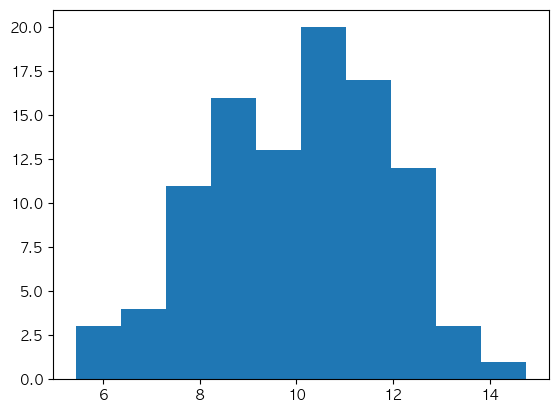

In [59]:
plt.hist(x)

In [60]:
x[98:100]=100 # 극단치를 임의로 저장

In [61]:
x

array([  8.57854766,   5.55955286,  12.25939784,   7.7261843 ,
         8.13497378,   5.83955769,  10.44799983,   9.70912716,
        12.29252568,   9.4610662 ,  11.87923429,  10.32546051,
        12.40291187,  12.91417155,   9.52813829,  12.063003  ,
         6.45526664,   9.83518458,   7.76440617,   9.95629202,
        10.43733478,  11.71593425,  12.07447983,   8.7117212 ,
         9.31474363,  13.50318753,   8.525534  ,  11.31464637,
        11.79758155,  11.31585244,  11.54182801,  10.28367087,
         8.61609713,   7.40536051,  14.76024995,  11.86696346,
        10.58775373,  10.67886733,  11.60248528,   9.61097333,
         8.09325511,   8.08985891,   9.35073195,  10.15806349,
         6.79862816,   7.64433736,  11.51370923,   7.50279149,
         9.18098698,   8.3825045 ,  10.50372302,  10.42804283,
         9.14279953,  10.31375116,   8.21671247,   5.42514303,
        10.7792064 ,  11.39812358,   8.6029583 ,   9.25400045,
        10.80212326,  11.56380782,  10.97746295,  11.07

In [63]:
np.mean(x)

11.846923249462328

In [64]:
np.std(x)

12.728838110062478

(array([98.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  5.42514303,  14.88262873,  24.34011442,  33.79760012,
         43.25508582,  52.71257152,  62.17005721,  71.62754291,
         81.08502861,  90.5425143 , 100.        ]),
 <BarContainer object of 10 artists>)

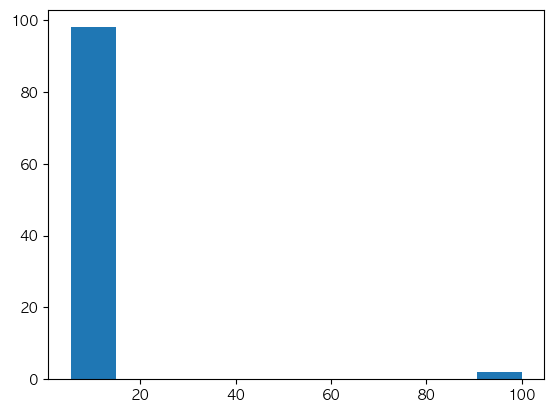

In [65]:
plt.hist(x)

(q3 + iqr*1.5) < data

or

(q1 - iqr*1.5) > data

In [66]:
pd.DataFrame(x).describe()

,0
count,100.000000
mean,11.846923
std,12.792964
min,5.425143
25%,8.727975
50%,10.319606
75%,11.547323
max,100.000000


In [70]:
q1 = pd.DataFrame(x).describe().iloc[4]

In [71]:
q3 = pd.DataFrame(x).describe().iloc[6]

In [72]:
iqr = q3-q1

In [73]:
q3+iqr*1.5 # high boundary

0    15.776344
dtype: float64

In [74]:
q1 -iqr*1.5 # low boundary
# 정상범위 : 6.49~13.77

0    4.498954
dtype: float64

In [79]:
x[(q3 + iqr*1.5).values < x]
x[((q3 + iqr*1.5).values >= x) & ((q1 - iqr*1.5).values < x)  ]
x[((q3 + iqr*1.5).values >= x) & ((q1 - iqr*1.5).values < x)  ].mean()

10.047880866798296

In [82]:
robust = RobustScaler()
robust.fit_transform(pd.DataFrame(y))

array([[ 0.5],
       [-1.5],
       [-0.5],
       [ 0.5],
       [ 2.5],
       [ 0. ],
       [-2. ],
       [ 1.5],
       [-0.5],
       [ 0. ]])

In [83]:
RobustScaler().fit_transform(pd.DataFrame(x))

array([[-6.17539386e-01],
       [-1.68835265e+00],
       [ 6.88028683e-01],
       [-9.19865842e-01],
       [-7.74871486e-01],
       [-1.58903718e+00],
       [ 4.55403190e-02],
       [-2.16531894e-01],
       [ 6.99778863e-01],
       [-3.04517132e-01],
       [ 5.53187716e-01],
       [ 2.07660668e-03],
       [ 7.38931957e-01],
       [ 9.20271672e-01],
       [-2.80727199e-01],
       [ 6.18369008e-01],
       [-1.37065015e+00],
       [-1.71820337e-01],
       [-9.06308849e-01],
       [-1.28864500e-01],
       [ 4.17575136e-02],
       [ 4.95266503e-01],
       [ 6.22439744e-01],
       [-5.70303797e-01],
       [-3.56416572e-01],
       [ 1.12919092e+00],
       [-6.36342908e-01],
       [ 3.52932904e-01],
       [ 5.24226145e-01],
       [ 3.53360689e-01],
       [ 4.33512411e-01],
       [-1.27458464e-02],
       [-6.04220889e-01],
       [-1.03365947e+00],
       [ 1.57506089e+00],
       [ 5.48835350e-01],
       [ 9.51099094e-02],
       [ 1.27427174e-01],
       [ 4.5

In [84]:
RobustScaler().fit_transform(pd.DataFrame(x))

array([[-6.17539386e-01],
       [-1.68835265e+00],
       [ 6.88028683e-01],
       [-9.19865842e-01],
       [-7.74871486e-01],
       [-1.58903718e+00],
       [ 4.55403190e-02],
       [-2.16531894e-01],
       [ 6.99778863e-01],
       [-3.04517132e-01],
       [ 5.53187716e-01],
       [ 2.07660668e-03],
       [ 7.38931957e-01],
       [ 9.20271672e-01],
       [-2.80727199e-01],
       [ 6.18369008e-01],
       [-1.37065015e+00],
       [-1.71820337e-01],
       [-9.06308849e-01],
       [-1.28864500e-01],
       [ 4.17575136e-02],
       [ 4.95266503e-01],
       [ 6.22439744e-01],
       [-5.70303797e-01],
       [-3.56416572e-01],
       [ 1.12919092e+00],
       [-6.36342908e-01],
       [ 3.52932904e-01],
       [ 5.24226145e-01],
       [ 3.53360689e-01],
       [ 4.33512411e-01],
       [-1.27458464e-02],
       [-6.04220889e-01],
       [-1.03365947e+00],
       [ 1.57506089e+00],
       [ 5.48835350e-01],
       [ 9.51099094e-02],
       [ 1.27427174e-01],
       [ 4.5

In [85]:
# 0~1 사이로 변환
from sklearn.preprocessing import MinMaxScaler

In [86]:
data

array([[28, 29, 26, 29, 22],
       [ 3, 15, 28, 17,  9],
       [12, 23,  1,  9, 21],
       [17, 24,  7,  4, 25],
       [24, 15,  5, 29, 21],
       [ 0,  1, 29,  5, 26]])

()각 열 데이터 - 각 열 최소 값) / (각 열 최대값 - 각 열 최소 값)

(15-2)/(15-2) = 1

(5-2)/(15-2) = 0.xxxxxx

...

(12-2)/(15-2) = 0.xxxxxxx

In [89]:
(data - data.min(axis=0))/(data.max(axis=0) - data.min(axis=0))

array([[1.        , 1.        , 0.89285714, 1.        , 0.76470588],
       [0.10714286, 0.5       , 0.96428571, 0.52      , 0.        ],
       [0.42857143, 0.78571429, 0.        , 0.2       , 0.70588235],
       [0.60714286, 0.82142857, 0.21428571, 0.        , 0.94117647],
       [0.85714286, 0.5       , 0.14285714, 1.        , 0.70588235],
       [0.        , 0.        , 1.        , 0.04      , 1.        ]])

In [90]:
mms = MinMaxScaler()

In [91]:
mms.fit_transform(data)

array([[1.        , 1.        , 0.89285714, 1.        , 0.76470588],
       [0.10714286, 0.5       , 0.96428571, 0.52      , 0.        ],
       [0.42857143, 0.78571429, 0.        , 0.2       , 0.70588235],
       [0.60714286, 0.82142857, 0.21428571, 0.        , 0.94117647],
       [0.85714286, 0.5       , 0.14285714, 1.        , 0.70588235],
       [0.        , 0.        , 1.        , 0.04      , 1.        ]])

In [92]:
from sklearn.preprocessing import Binarizer

In [94]:
bnr = Binarizer(threshold=10) # 데이터를 2진화(기준값)

In [95]:
bnr.transform(data)

array([[1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 0, 1],
       [1, 1, 0, 1, 1],
       [0, 0, 1, 0, 1]])

Binarizer : 연속형 변수 -> 0/1

OneHotEncoder : 범주형 변수 -> 0/1

In [96]:
from sklearn.preprocessing import OneHotEncoder

In [97]:
ohe = OneHotEncoder()

ohe.fit(데이터 변수) # 범주형 변수 -> 이항변

In [100]:
train=np.array([[0, 0, 0],[0, 1, 1],[0, 2, 2],[1, 0, 3],[1, 1, 4]])
train

array([[0, 0, 0],
       [0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4]])

In [101]:
ohe.fit(train)

OneHotEncoder()

In [102]:
ohe.categories_

[array([0, 1]), array([0, 1, 2]), array([0, 1, 2, 3, 4])]

In [103]:
ohe.n_features_in_

3

In [105]:
ohe.transform(train)

<5x10 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [107]:
ohe.transform(train).toarray()

array([[1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [114]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

titanic = sns.load_dataset("titanic")
titanic

# 1. 표준화와 정규화 수행 (나이, 운임(fare))
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# 나이와 운임 열 추출
age_fare = titanic[['age', 'fare']]

# 결측값 처리 (평균으로 대체)
age_fare = age_fare.fillna(age_fare.mean())

# 표준화
age_fare_standardized = scaler_standard.fit_transform(age_fare)
titanic[['Age_standardized', 'Fare_standardized']] = age_fare_standardized

# 정규화
age_fare_normalized = scaler_minmax.fit_transform(age_fare)
titanic[['Age_normalized', 'Fare_normalized']] = age_fare_normalized

# 2. parch + sibsp = family 열 추가
titanic['family'] = titanic['parch'] + titanic['sibsp']

# 3. family 열을 5명 기준으로 1과 0으로 변환
titanic['family_flag'] = (titanic['family'] >= 5).astype(int)

# 4. fare와 age 열 간의 상관관계
fare_age_corr = titanic[['fare', 'age']].corr().iloc[0, 1]

# 5. fare와 survived 열 간의 상관관계
fare_survived_corr = titanic[['fare', 'survived']].corr().iloc[0, 1]

# 6. embark_town에서 첫번째 글자만 추출하여 embark_town_name에 저장
titanic['embark_town_name'] = titanic['embarked'].str[0]


# 결과 출력
{
    'fare_age_corr': fare_age_corr,
    'fare_survived_corr': fare_survived_corr
}


{'fare_age_corr': 0.09606669176903912,
 'fare_survived_corr': 0.2573065223849626}